In [67]:
# Importing Dependencies
import pandas as pd
import json
import tweepy
import matplotlib.pyplot as plt
import numpy as np 
from datetime import datetime
from matplotlib import style
style.use('ggplot')

#import and initialize Vader Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [10]:
#Creating a path to the .csv file containing the stock data
# reading the data into a dataframe
file_path = "@facebook_data_05242018_to_06182018.csv"
df = pd.read_csv(file_path)

In [11]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,5/24/2017,148.509995,150.229996,148.419998,150.039993,150.039993,17862400
1,5/25/2017,150.300003,152.589996,149.949997,151.960007,151.960007,19891400
2,5/26/2017,152.229996,152.250000,151.149994,152.130005,152.130005,14996200
3,5/30/2017,151.970001,152.899994,151.639999,152.380005,152.380005,13226000
4,5/31/2017,152.699997,153.350006,151.089996,151.460007,151.460007,18023900


In [12]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
bday_us = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [13]:
ts = pd.Series(list(df["Close"]),index=pd.date_range('05/24/2017',periods=269,freq = bday_us) )
ts

2017-05-24    150.039993
2017-05-25    151.960007
2017-05-26    152.130005
2017-05-30    152.380005
2017-05-31    151.460007
2017-06-01    151.529999
2017-06-02    153.610001
2017-06-05    153.630005
2017-06-06    152.809998
2017-06-07    153.119995
2017-06-08    154.710007
2017-06-09    149.600006
2017-06-12    148.440002
2017-06-13    150.679993
2017-06-14    150.250000
2017-06-15    149.800003
2017-06-16    150.639999
2017-06-19    152.869995
2017-06-20    152.250000
2017-06-21    153.910004
2017-06-22    153.399994
2017-06-23    155.070007
2017-06-26    153.589996
2017-06-27    150.580002
2017-06-28    153.240005
2017-06-29    151.039993
2017-06-30    150.979996
2017-07-03    148.429993
2017-07-05    150.339996
2017-07-06    148.820007
                 ...    
2018-05-08    177.970001
2018-05-09    178.919998
2018-05-10    182.660004
2018-05-11    185.529999
2018-05-14    186.990005
2018-05-15    186.639999
2018-05-16    184.320007
2018-05-17    183.199997
2018-05-18    183.759995


In [14]:
ts.cumsum()
ts

2017-05-24    150.039993
2017-05-25    151.960007
2017-05-26    152.130005
2017-05-30    152.380005
2017-05-31    151.460007
2017-06-01    151.529999
2017-06-02    153.610001
2017-06-05    153.630005
2017-06-06    152.809998
2017-06-07    153.119995
2017-06-08    154.710007
2017-06-09    149.600006
2017-06-12    148.440002
2017-06-13    150.679993
2017-06-14    150.250000
2017-06-15    149.800003
2017-06-16    150.639999
2017-06-19    152.869995
2017-06-20    152.250000
2017-06-21    153.910004
2017-06-22    153.399994
2017-06-23    155.070007
2017-06-26    153.589996
2017-06-27    150.580002
2017-06-28    153.240005
2017-06-29    151.039993
2017-06-30    150.979996
2017-07-03    148.429993
2017-07-05    150.339996
2017-07-06    148.820007
                 ...    
2018-05-08    177.970001
2018-05-09    178.919998
2018-05-10    182.660004
2018-05-11    185.529999
2018-05-14    186.990005
2018-05-15    186.639999
2018-05-16    184.320007
2018-05-17    183.199997
2018-05-18    183.759995


In [118]:
pd.date_range('05/24/2017', '06/18/2018', freq = 'B')

DatetimeIndex(['2017-05-24', '2017-05-25', '2017-05-26', '2017-05-29',
               '2017-05-30', '2017-05-31', '2017-06-01', '2017-06-02',
               '2017-06-05', '2017-06-06',
               ...
               '2018-06-05', '2018-06-06', '2018-06-07', '2018-06-08',
               '2018-06-11', '2018-06-12', '2018-06-13', '2018-06-14',
               '2018-06-15', '2018-06-18'],
              dtype='datetime64[ns]', length=279, freq='B')

In [119]:
tv = pd.Series(list(df["Volume"]),index=pd.date_range('05/24/2017',periods=269,freq = bday_us) )
tv

2017-05-24    17862400
2017-05-25    19891400
2017-05-26    14996200
2017-05-30    13226000
2017-05-31    18023900
2017-06-01    14530600
2017-06-02    16854400
2017-06-05    12520400
2017-06-06    13457100
2017-06-07    12066700
2017-06-08    17719700
2017-06-09    35577700
2017-06-12    33170200
2017-06-13    20483400
2017-06-14    20808800
2017-06-15    18994200
2017-06-16    22882400
2017-06-19    19026500
2017-06-20    14743900
2017-06-21    15039800
2017-06-22    13005500
2017-06-23    18027000
2017-06-26    18049700
2017-06-27    19360800
2017-06-28    16719100
2017-06-29    23973500
2017-06-30    17666000
2017-07-03    13862700
2017-07-05    14334300
2017-07-06    14951800
                ...   
2018-05-08    18697200
2018-05-09    15577200
2018-05-10    23282800
2018-05-11    21071400
2018-05-14    21207800
2018-05-15    15646700
2018-05-16    15429400
2018-05-17    16975500
2018-05-18    14840700
2018-05-21    13130500
2018-05-22    13532900
2018-05-23    12731400
2018-05-24 

In [144]:
tv.cumsum()

2017-05-24      17862400
2017-05-25      37753800
2017-05-26      52750000
2017-05-30      65976000
2017-05-31      83999900
2017-06-01      98530500
2017-06-02     115384900
2017-06-05     127905300
2017-06-06     141362400
2017-06-07     153429100
2017-06-08     171148800
2017-06-09     206726500
2017-06-12     239896700
2017-06-13     260380100
2017-06-14     281188900
2017-06-15     300183100
2017-06-16     323065500
2017-06-19     342092000
2017-06-20     356835900
2017-06-21     371875700
2017-06-22     384881200
2017-06-23     402908200
2017-06-26     420957900
2017-06-27     440318700
2017-06-28     457037800
2017-06-29     481011300
2017-06-30     498677300
2017-07-03     512540000
2017-07-05     526874300
2017-07-06     541826100
                 ...    
2018-05-08    5388327300
2018-05-09    5403904500
2018-05-10    5427187300
2018-05-11    5448258700
2018-05-14    5469466500
2018-05-15    5485113200
2018-05-16    5500542600
2018-05-17    5517518100
2018-05-18    5532358800


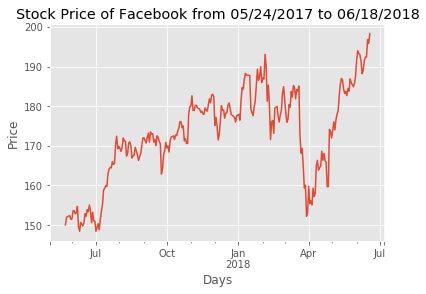

In [160]:
# Plotting a line chart for stock price performance
plt.title("Stock Price of Facebook from 05/24/2017 to 06/18/2018")
plt.xlabel("Days")
plt.ylabel("Price")
ts.plot()
plt.savefig("facebook_stockprice.png")


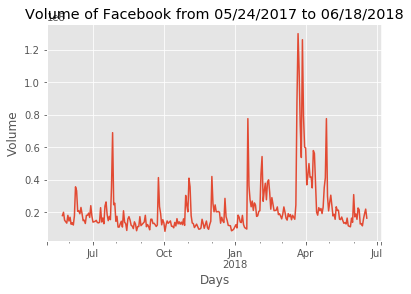

In [161]:
plt.title("Volume of Facebook from 05/24/2017 to 06/18/2018")
plt.xlabel("Days")
plt.ylabel("Volume")
tv.plot()
plt.savefig("facebook_volume.png")

In [163]:
#Creating a path to the .csv file containing the stock data
# reading the data into a dataframe
file_path1 = "MBstockdata_06142015_06192018.csv"
df1 = pd.read_csv(file_path1)

In [164]:
len(df1)

716

In [165]:
ts1 = pd.Series(list(df1["Close"]),index=pd.date_range('06/14/2015',periods=716,freq = bday_us) )
ts1

2015-06-15    12.330000
2015-06-16    12.800000
2015-06-17    13.020000
2015-06-18    13.280000
2015-06-19    13.370000
2015-06-22    13.740000
2015-06-23    13.740000
2015-06-24    12.800000
2015-06-25    12.060000
2015-06-26    13.180000
2015-06-29    13.740000
2015-06-30    14.020000
2015-07-01    14.030000
2015-07-02    14.960000
2015-07-06    15.540000
2015-07-07    15.450000
2015-07-08    15.680000
2015-07-09    15.140000
2015-07-10    14.870000
2015-07-13    14.270000
2015-07-14    15.510000
2015-07-15    15.690000
2015-07-16    15.730000
2015-07-17    15.770000
2015-07-20    15.660000
2015-07-21    15.660000
2015-07-22    15.750000
2015-07-23    15.870000
2015-07-24    15.900000
2015-07-27    16.760000
                ...    
2018-03-12    44.599998
2018-03-13    43.750000
2018-03-14    36.049999
2018-03-15    36.599998
2018-03-16    38.400002
2018-03-19    38.599998
2018-03-20    38.150002
2018-03-21    39.049999
2018-03-22    39.049999
2018-03-23    39.400002
2018-03-26    39

In [166]:
ts1.cumsum()

2015-06-15       12.330000
2015-06-16       25.130000
2015-06-17       38.150000
2015-06-18       51.430000
2015-06-19       64.800000
2015-06-22       78.540000
2015-06-23       92.280000
2015-06-24      105.080000
2015-06-25      117.140000
2015-06-26      130.320000
2015-06-29      144.060000
2015-06-30      158.080000
2015-07-01      172.110000
2015-07-02      187.070000
2015-07-06      202.610000
2015-07-07      218.060000
2015-07-08      233.740000
2015-07-09      248.880000
2015-07-10      263.750000
2015-07-13      278.020000
2015-07-14      293.530000
2015-07-15      309.220000
2015-07-16      324.950000
2015-07-17      340.720000
2015-07-20      356.380000
2015-07-21      372.040000
2015-07-22      387.790000
2015-07-23      403.660000
2015-07-24      419.560000
2015-07-27      436.320000
                  ...     
2018-03-12    15606.809987
2018-03-13    15650.559987
2018-03-14    15686.609986
2018-03-15    15723.209984
2018-03-16    15761.609986
2018-03-19    15800.209984
2

In [167]:
tv1 = pd.Series(list(df1["Volume"]),index=pd.date_range('06/14/2015',periods=716,freq = bday_us) )
tv1.cumsum()

2015-06-15       129200
2015-06-16       286300
2015-06-17       512800
2015-06-18       730000
2015-06-19       986000
2015-06-22      1101400
2015-06-23      1331200
2015-06-24      1752900
2015-06-25      2014600
2015-06-26      2181300
2015-06-29      2326100
2015-06-30      2437400
2015-07-01      2621900
2015-07-02      2790800
2015-07-06      2997800
2015-07-07      3119000
2015-07-08      3284000
2015-07-09      3402300
2015-07-10      3663600
2015-07-13      3832700
2015-07-14      4097800
2015-07-15      4372800
2015-07-16      4578700
2015-07-17      4729900
2015-07-20      5354000
2015-07-21      5446900
2015-07-22      5716700
2015-07-23      5856600
2015-07-24      6306700
2015-07-27      6979700
                ...    
2018-03-12    231238100
2018-03-13    231894800
2018-03-14    235469500
2018-03-15    236860700
2018-03-16    238199300
2018-03-19    239320900
2018-03-20    239901500
2018-03-21    240430400
2018-03-22    240940100
2018-03-23    241271700
2018-03-26    24

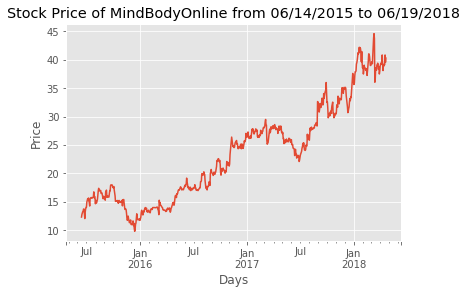

In [168]:
# Plotting a line chart for stock price performance
plt.title("Stock Price of MindBodyOnline from 06/14/2015 to 06/19/2018")
plt.xlabel("Days")
plt.ylabel("Price")
ts1.plot()
plt.savefig("mindbodyonline_stockprice.png")


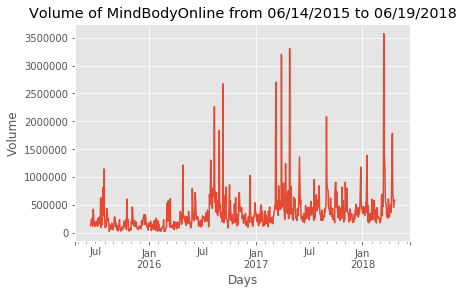

In [169]:
# Plotting a line chart for Volume
plt.title("Volume of MindBodyOnline from 06/14/2015 to 06/19/2018")
plt.xlabel("Days")
plt.ylabel("Volume")
tv1.plot()
plt.savefig("mindbodyonline_volume.png")

In [37]:
#Creating a path to the .csv file containing the stock data for Nintendo America
# reading the data into a dataframe
file_path3 = "NintendoAmericastockdata_09232016_to_06192018.csv"
df3 = pd.read_csv(file_path3)

In [38]:
len(df3)

437

In [39]:
df3

,date,close,volume,open,high,low
0,6/19/2018,40.880,644824,40.560,41.0300,40.5600
1,6/18/2018,41.650,923037,41.810,41.8500,41.2400
2,6/15/2018,42.990,1107737,42.620,43.0400,42.5900
3,6/14/2018,42.560,961964,42.815,42.9400,42.4200
4,6/13/2018,44.330,880138,44.170,44.4300,44.0500
5,6/12/2018,47.080,850051,47.550,48.6400,47.0300
6,6/11/2018,47.630,377002,47.498,47.9300,47.2100
7,6/8/2018,47.515,346069,47.110,47.5400,47.1100
8,6/7/2018,46.310,515400,46.570,46.7400,46.1700
9,6/6/2018,45.090,726387,45.030,45.2800,44.9000


In [41]:
ts2 = pd.Series(list(df3["close"]),index=pd.date_range('09/23/2016',periods=437,freq = bday_us) )
ts2

2016-09-23    40.880
2016-09-26    41.650
2016-09-27    42.990
2016-09-28    42.560
2016-09-29    44.330
2016-09-30    47.080
2016-10-03    47.630
2016-10-04    47.515
2016-10-05    46.310
2016-10-06    45.090
2016-10-07    46.765
2016-10-11    47.050
2016-10-12    50.050
2016-10-13    51.040
2016-10-14    51.340
2016-10-17    48.400
2016-10-18    48.240
2016-10-19    47.920
2016-10-20    49.200
2016-10-21    49.760
2016-10-24    49.905
2016-10-25    51.170
2016-10-26    52.500
2016-10-27    52.180
2016-10-28    52.010
2016-10-31    52.260
2016-11-01    52.650
2016-11-02    52.150
2016-11-03    53.150
2016-11-04    54.420
               ...  
2018-05-10    30.330
2018-05-11    30.250
2018-05-14    30.100
2018-05-15    30.090
2018-05-16    30.170
2018-05-17    29.650
2018-05-18    28.030
2018-05-21    29.580
2018-05-22    29.090
2018-05-23    30.470
2018-05-24    32.365
2018-05-25    31.590
2018-05-29    31.629
2018-05-30    31.230
2018-05-31    32.020
2018-06-01    31.220
2018-06-04   

In [42]:
ts2.cumsum()

2016-09-23       40.8800
2016-09-26       82.5300
2016-09-27      125.5200
2016-09-28      168.0800
2016-09-29      212.4100
2016-09-30      259.4900
2016-10-03      307.1200
2016-10-04      354.6350
2016-10-05      400.9450
2016-10-06      446.0350
2016-10-07      492.8000
2016-10-11      539.8500
2016-10-12      589.9000
2016-10-13      640.9400
2016-10-14      692.2800
2016-10-17      740.6800
2016-10-18      788.9200
2016-10-19      836.8400
2016-10-20      886.0400
2016-10-21      935.8000
2016-10-24      985.7050
2016-10-25     1036.8750
2016-10-26     1089.3750
2016-10-27     1141.5550
2016-10-28     1193.5650
2016-10-31     1245.8250
2016-11-01     1298.4750
2016-11-02     1350.6250
2016-11-03     1403.7750
2016-11-04     1458.1950
                 ...    
2018-05-10    16852.4696
2018-05-11    16882.7196
2018-05-14    16912.8196
2018-05-15    16942.9096
2018-05-16    16973.0796
2018-05-17    17002.7296
2018-05-18    17030.7596
2018-05-21    17060.3396
2018-05-22    17089.4296


In [170]:
tv2 = pd.Series(list(df3["volume"]),index=pd.date_range('09/23/2016',periods=437,freq = bday_us) )
tv2.cumsum()

2016-09-23       644824
2016-09-26      1567861
2016-09-27      2675598
2016-09-28      3637562
2016-09-29      4517700
2016-09-30      5367751
2016-10-03      5744753
2016-10-04      6090822
2016-10-05      6606222
2016-10-06      7332609
2016-10-07      7786415
2016-10-11      8746061
2016-10-12      9346505
2016-10-13      9665524
2016-10-14     10156842
2016-10-17     10503505
2016-10-18     10864216
2016-10-19     11673343
2016-10-20     12008829
2016-10-21     12262871
2016-10-24     12541929
2016-10-25     12978580
2016-10-26     13045805
2016-10-27     13174403
2016-10-28     13378125
2016-10-31     13551314
2016-11-01     13865340
2016-11-02     14409250
2016-11-03     14880962
2016-11-04     15358157
                ...    
2018-05-10    168217511
2018-05-11    168333604
2018-05-14    168548764
2018-05-15    168794078
2018-05-16    169220286
2018-05-17    169656671
2018-05-18    170396281
2018-05-21    170599032
2018-05-22    171348133
2018-05-23    172008862
2018-05-24    17

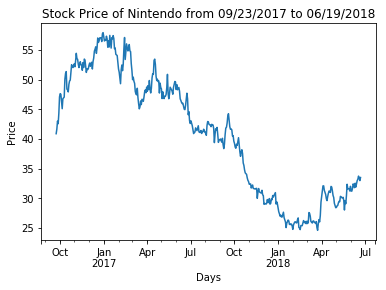

In [43]:
# Plotting a line chart for stock price performance
plt.title("Stock Price of Nintendo from 09/23/2017 to 06/19/2018")
plt.xlabel("Days")
plt.ylabel("Price")
ts2.plot()
plt.savefig("nintendo_stockprice.png")


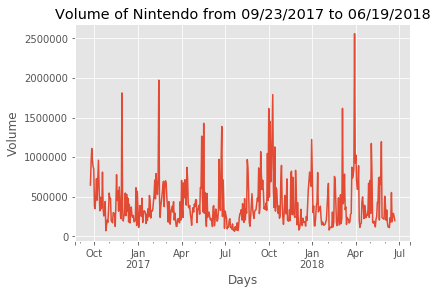

In [171]:
# Plotting a line chart for volume performance
plt.title("Volume of Nintendo from 09/23/2017 to 06/19/2018")
plt.xlabel("Days")
plt.ylabel("Volume")
tv2.plot()
plt.savefig("nintendo_volume.png")